# Titanic Project (Practice Project-4)

Problem Statement:-

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
# Importing all the necessary libraries here.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter("ignore")
import joblib

In [7]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis 

In [8]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Columns Passenger ID and Name are contributing no inputs since they are just unique values and no insights can be extracted from them so first I will drop them. 

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [15]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S


In [16]:
df.shape

(891, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data types of the columns are : float, integer, object type. Some null values are also present in the columns of Age, Cabin, Embarked.

In [19]:
 # Checking Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#getting percentage of null values present in data
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:title={'center':'Null values '}>

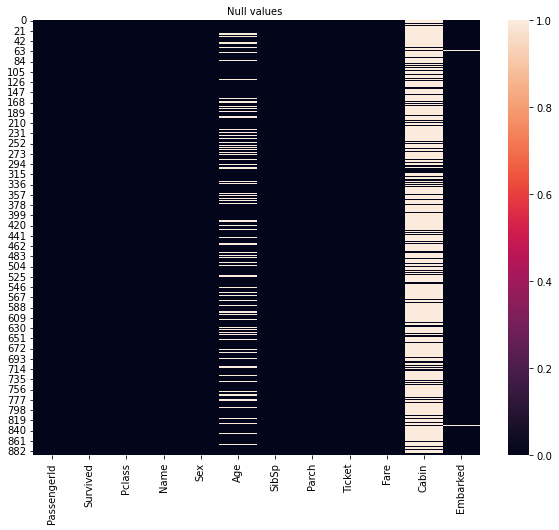

In [21]:
#ploting dataset for double check null values

plt.figure(figsize=(10,8))
plt.title('Null values ',fontsize=10)
sns.heatmap(df.isnull())

From above heatmap it is clear that Cabin column has most of the missing data, So we need to drop the column.

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df = df.drop(["PassengerId", "Name"], axis=1)

Dropping the "PassengerId" and "Name" coulmns from our dataset because they were logically not useful for prediction

In [24]:
df = df.drop("Cabin", axis=1)

We have dropped the "Cabin" column since most of its data was missing around 75 percent.

In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


This is New Dataframe after dropping PassengerID , Name and Cabin Column.



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [28]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Using the skew method we can see if there is any skewness in our dataset indicating any kind of outliers. 

# Data Visualization

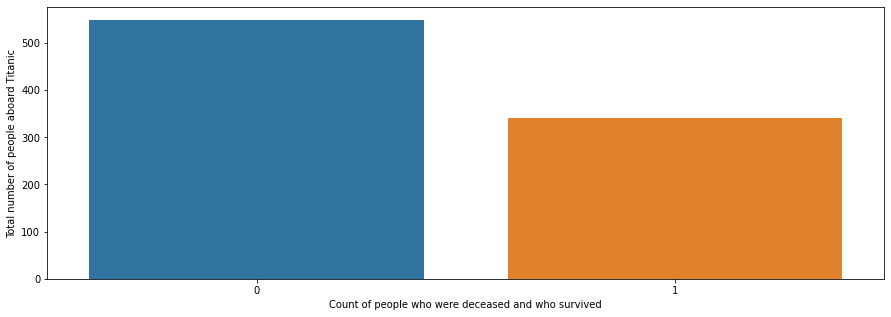

In [29]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df)
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

In the above count plot 0 depicts the number of people who drowned when the Titanic sank and 1 depicts the people who survived the sinking. We can see that more number of people drowned when the Titanic was sinking and one's who survived represent a lesser number in comparison.

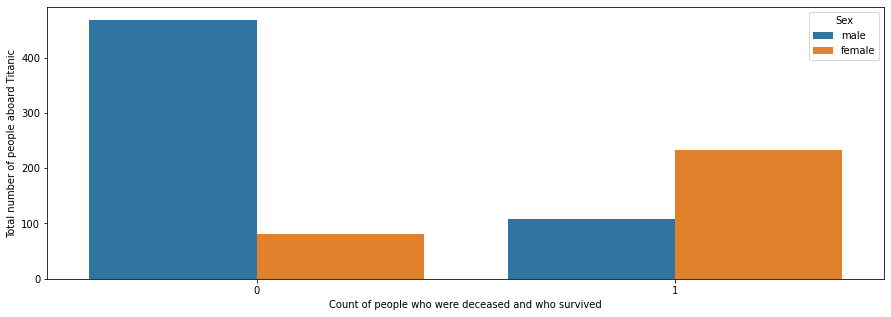

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Sex')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Adding the sex column shows us a representation on how more men died when compared to women since in Titanic the rescue operations prioritized the life boat usage for women and children. So women survived more than men.

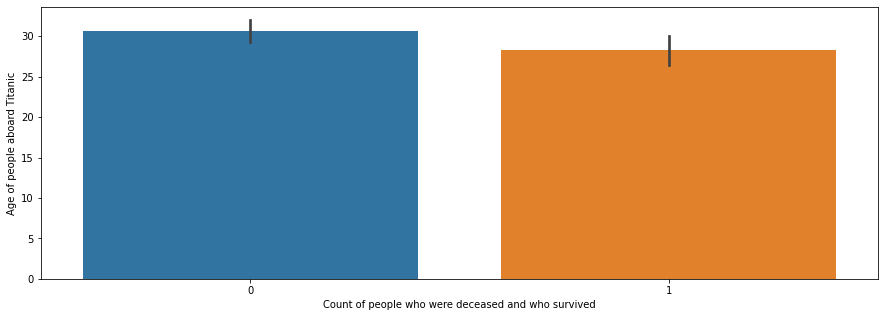

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x='Survived',y='Age',data=df)
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Age of people aboard Titanic')
plt.show()

From the above Bar plot, between 25 to 30 years of aged pleople survived more and above the age of 30 years were died in higher number.

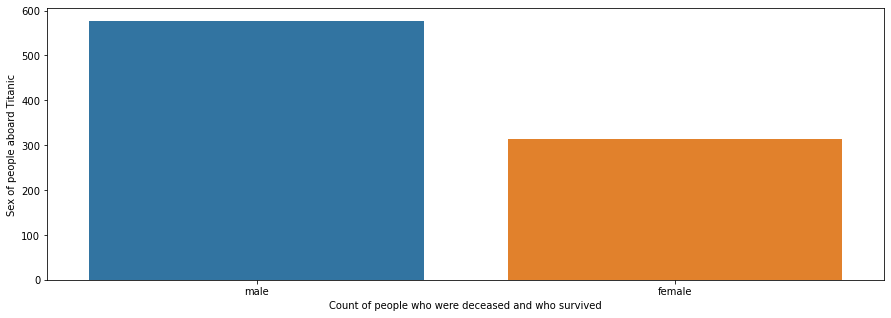

In [33]:
plt.figure(figsize=(15,5))
sns.countplot('Sex',data=df)
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Sex of people aboard Titanic')
plt.show()

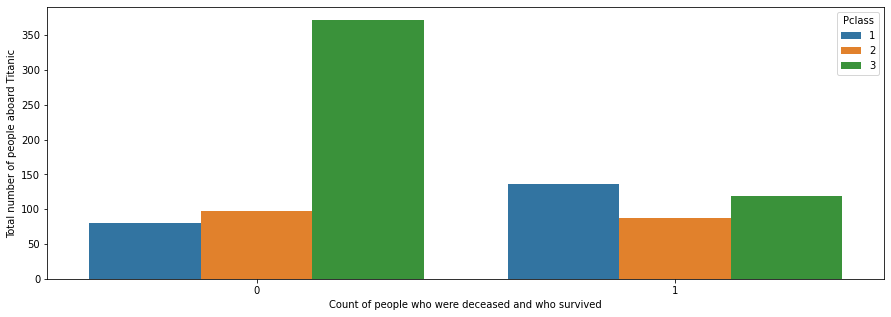

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Pclass')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Just like the Sex column when I tried checking for a visual representation over the passenger class factor I see that the highest number of deaths happened for class 3 people because again the rescue team gave priority based on class and passengers from class 1 were rescued first then class 2 and by the time class 3 folks were being rescued they ran out of life boats and time as well since the Titanic had almost sank into the ocean.

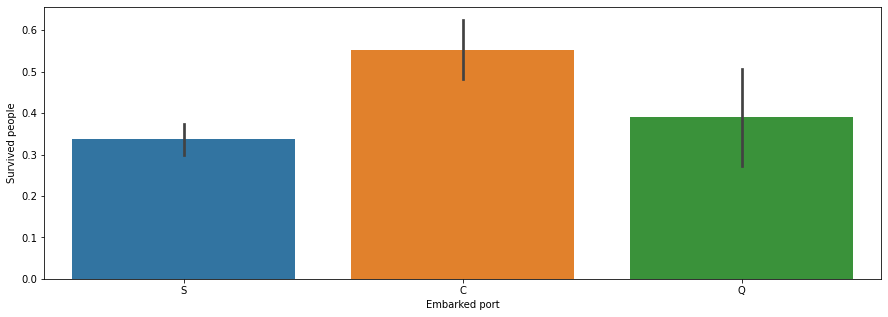

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='Embarked',y='Survived',data=df)
plt.xlabel('Embarked port')
plt.ylabel('Survived people')
plt.show()

From the above Bar plot (C = Cherbourg; Q = Queenstown; S = Southampton)Port of Embarked "C" has most survived people.

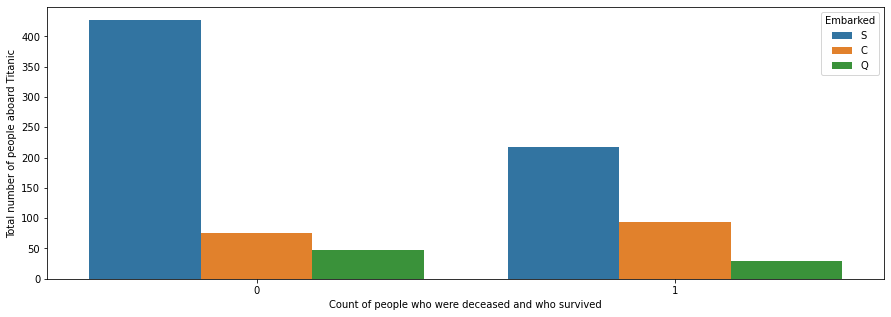

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Embarked')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()


Taking a look at the embarked data it looks like the port where the passengers embarked the Titanic has very less to offer but definitely indicates that it still has inputs in terms of folks traveling from S=Southampton have died the most than they survived.

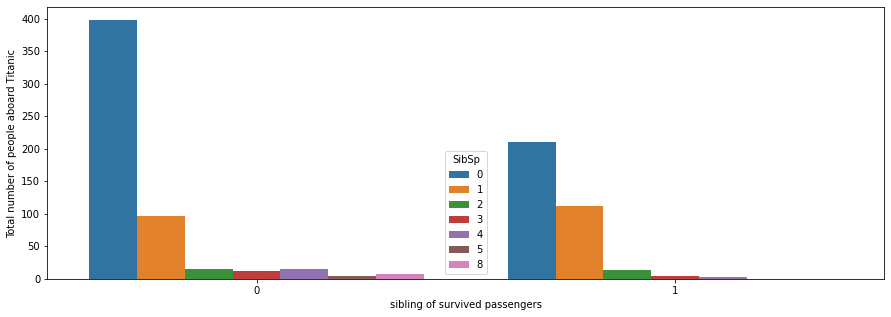

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='SibSp')
plt.xlabel('sibling of survived passengers')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

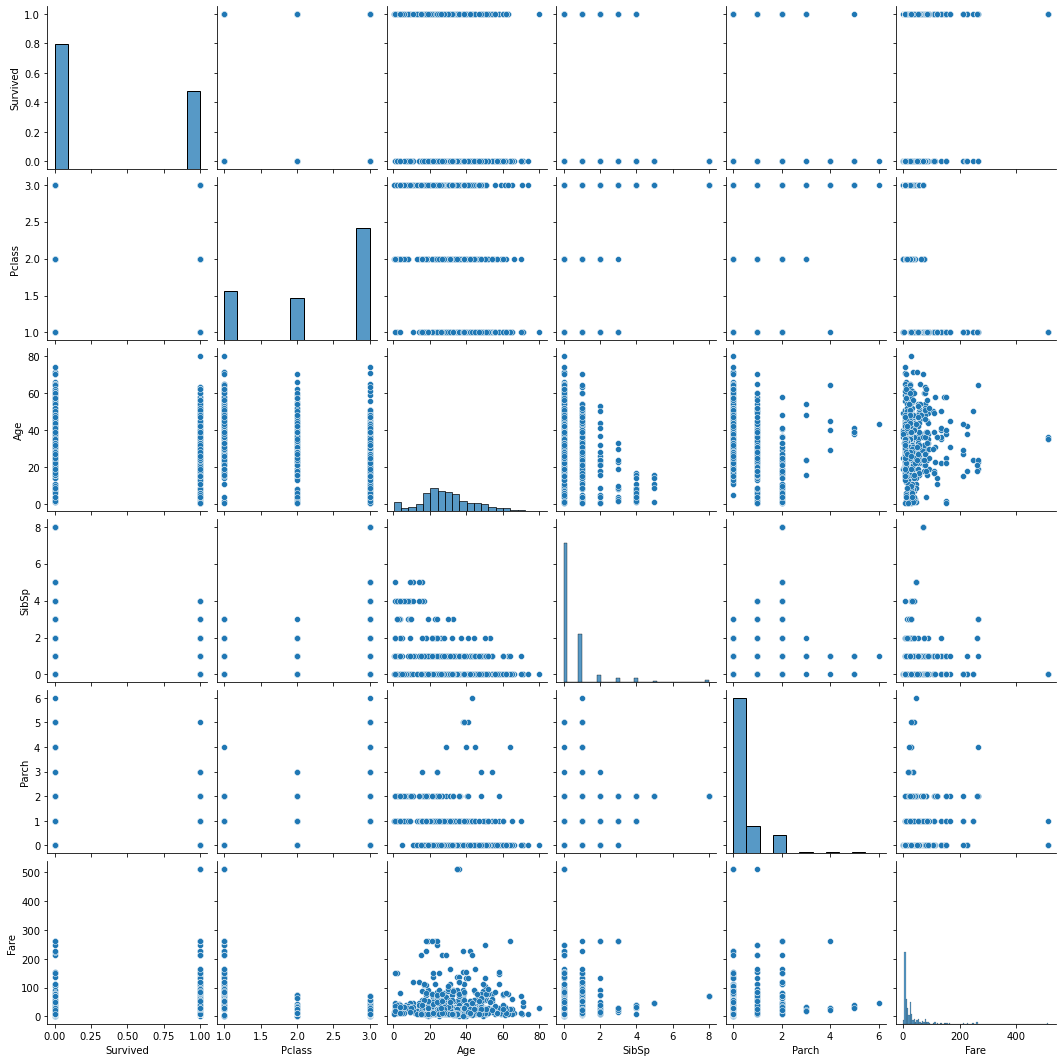

In [39]:
# Pair Plot
sns.pairplot(df)
plt.show()

The pairplot gives us a visualization on scatter plot + histogram showing us the outliers as well as the skewness data. Looking at the above picture we can see the presence of both skewness and outliers but we shall check few more visuals to confirm if those need to be treated or not.

In [40]:
df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S


The first 8 records of dataset and can observe that again "Ticket" column just shows a list of numbers paired with few alphabets that is basically indicating towards the unique allotment given to the passengers validating them to be eligible the board the Titanic. As it serves no purpose in the prediction of survival rate of the people cruising the Titanic I will remove this column too.

In [41]:
df = df.drop("Ticket", axis=1)

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Fixing and Filling the missing values

In [43]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

 missing values issues we will need to fix it using the mean option for "Age" column and mode for the "Embarked" column.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

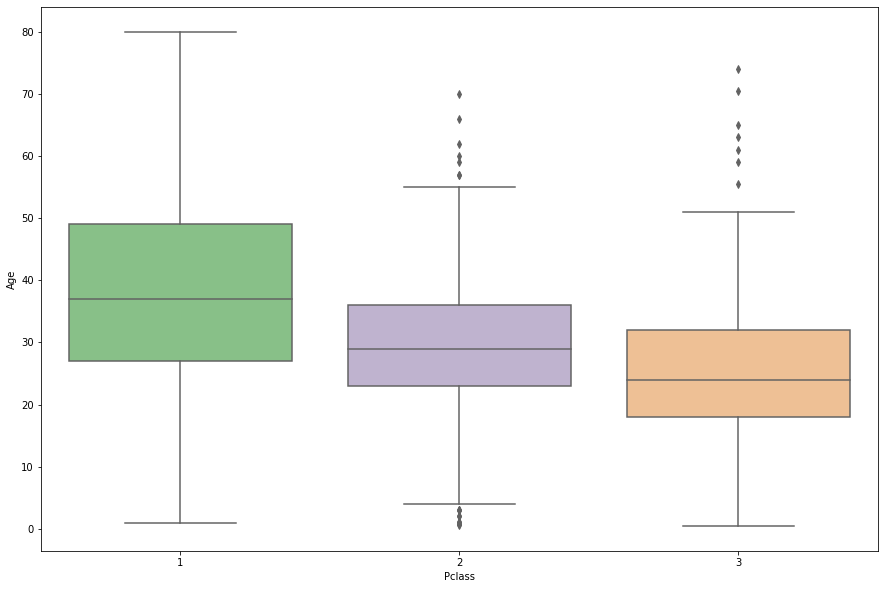

In [45]:
# Box Plot
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=df, palette="Accent")

For filling the missing value in the age column I am checking the average age of a person in that particular class so that we do not just randomly fill in those years for the age column.

In the above boxplot it shows that the class 1 people who are wealthy are above the average age for the other 2 class and in the class 3 there were mostly youngsters who did not have hefty money at that age.

In [46]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

So we have created a function after applying the observations from the boxplot to get the average age based on the class of travel. In class 1 we see average age as 37, for class 2 the average age is around 29 and class 3 has an approximate avergae age of 24.


We will now use this function to fill the missing age values

In [47]:
df["Age"] = df[["Age","Pclass"]].apply(fill_age, axis=1)

Using our fill_age function we have now added the average years data into the age column of our data set.

In [48]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

 We have used the mode option to fill the missing data in Embarked column with the value most common for the column row wise.

In [49]:
# Encoding
df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


we can use the pandas get_dummies method to encode the categorical object datatype 'Sex' and 'Embarked' columns. Since get_dummies uses the One Hot Encoding mechanism we are able to get extra columns where the rows are converted to indicator variables.

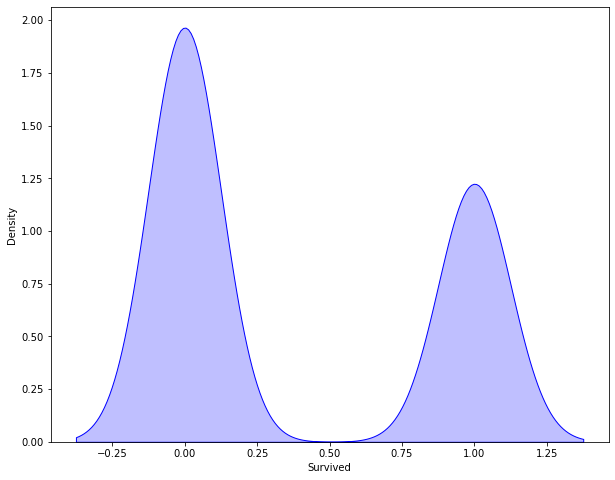

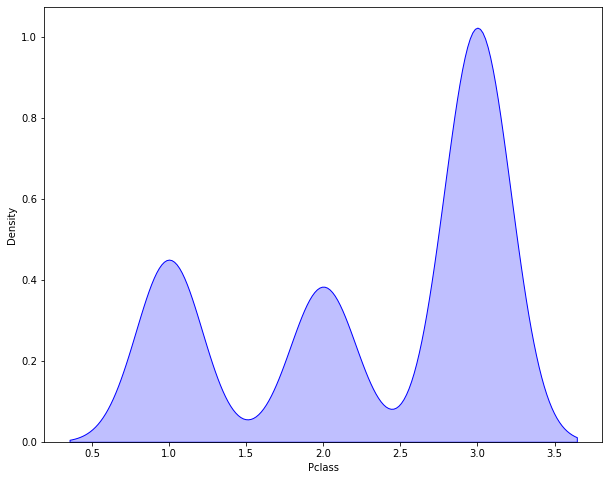

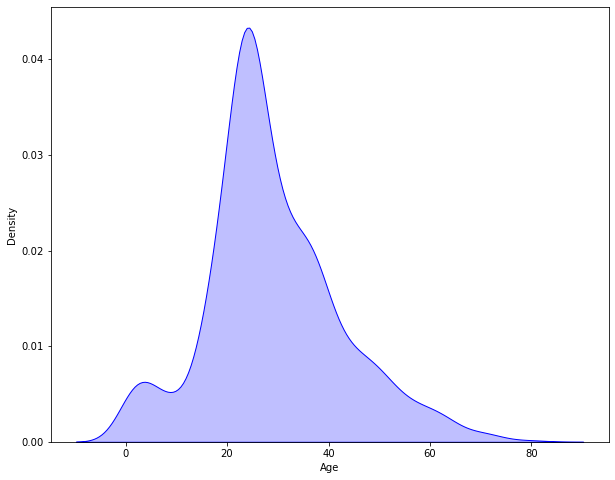

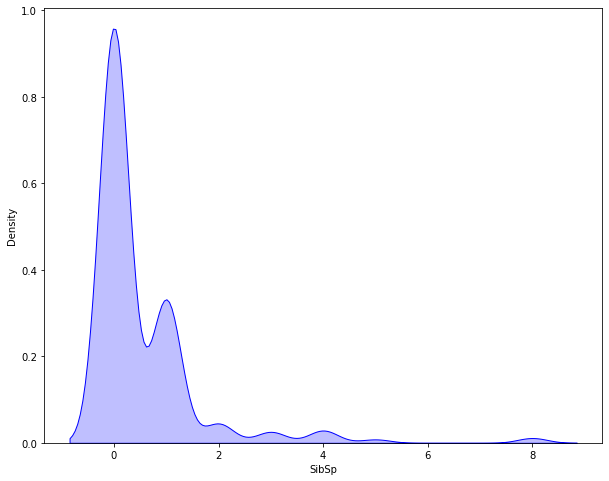

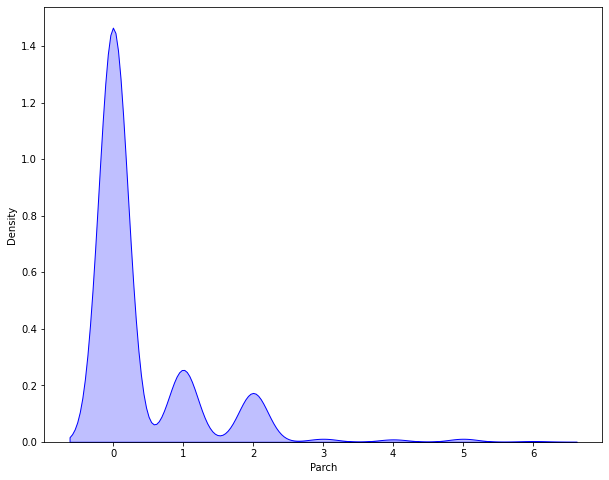

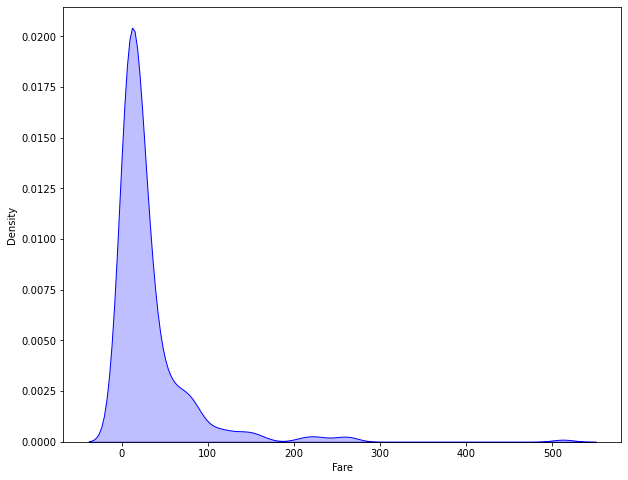

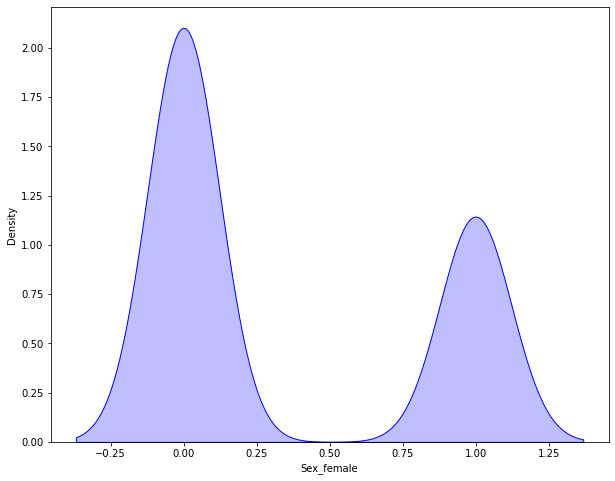

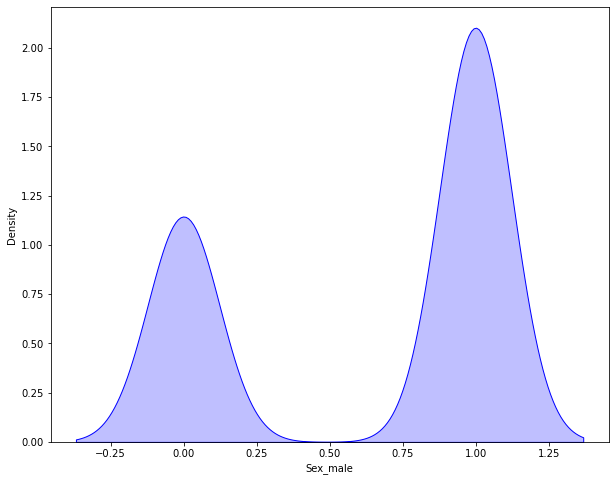

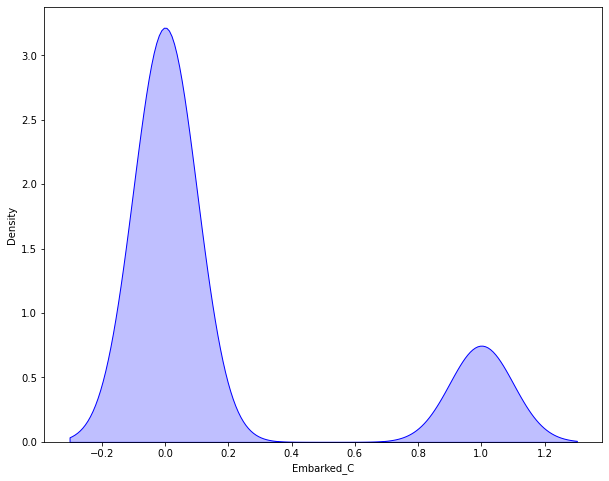

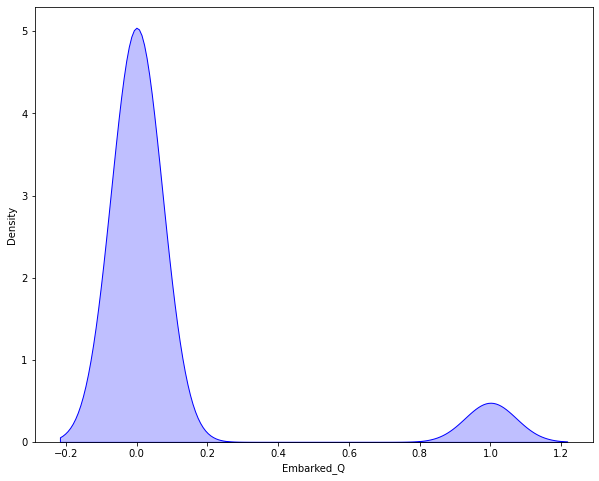

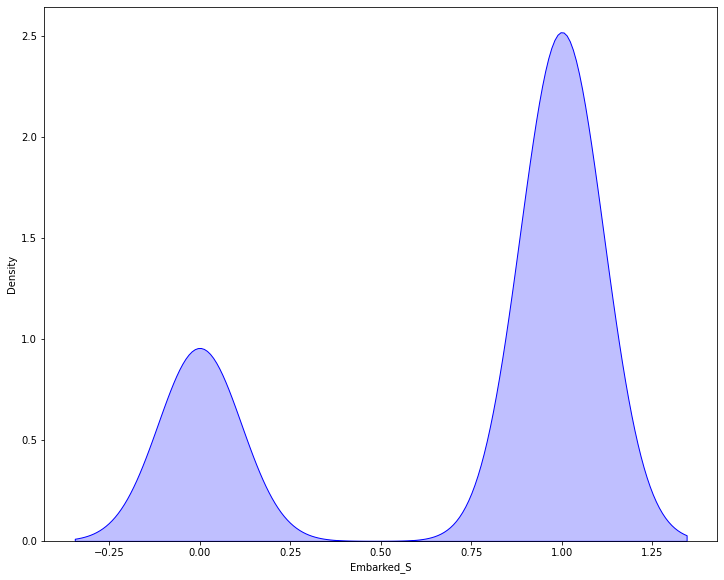

In [50]:
# Distribution Plot
for col, value in df.items():
    plt.figure(figsize=(10,8))
    sns.distplot(value, hist=False, color="b", kde_kws={"shade": True})
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

From the above distribution plot after applying the encoding technique and ensuring all object datatype are converted to numbers that can be used for visualization, we can see that the presence of outliers are affecting the distribution patterns and causing skewness that might need to be treated.

# Heatmap for Correlation

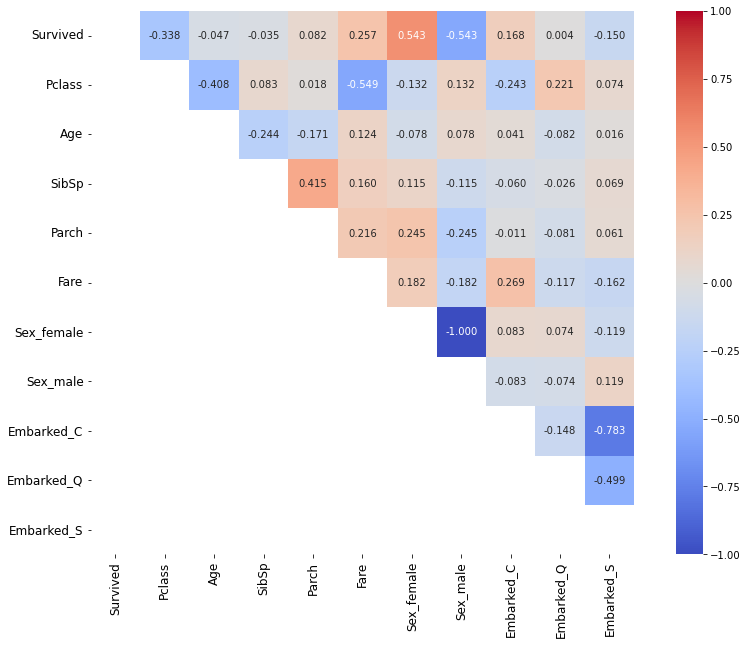

In [53]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="coolwarm", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [54]:
X = df.drop("Survived", axis=1)
Y = df["Survived"]

 separated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Scaling

In [55]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.533834,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.674891,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.231653,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.448255,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.448255,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.156107,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.760469,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.382743,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.231653,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [56]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,2.993303e-16,3.456519e-16,6.716164e-17,-4.373606e-17,3.162453e-16,-4.059603e-16,1.167541e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.164100e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
25%,-3.693648e-01,-5.338337e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
50%,8.273772e-01,-2.316526e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
75%,8.273772e-01,5.993453e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.355574e+00,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
max,8.273772e-01,3.847792e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373e+00,6.158384e-01


Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our feature data set.

In [57]:
X = X.drop(["SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S"], axis=1)


I have dropped the SibSp, Parch, Embarked_C, Embarked_Q and Embarked_S columns from the features list to check if that improves the accuracy for our classification models since as per the correlation details we saw it did not have much input for any kind of corresponse with the survival rate.

# Model Building

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)


# Classification and Evaluation Metrics

In [61]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any classification machine learning model that calls for this function.

Note: I have not removed the outliers since the loss of those data gave a lower score on the classification model when compared to retaining the outliers. Also the usage of Z score and IQR methods gave a data loss of more than 15 percent.

In [62]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 79.3296089385475

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Cross Validation Score: 79.46142740568703

Accuracy Score - Cross Validation Score is -0.1318184671395386


In [63]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 81.56424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Cross Validation Score: 80.02573598644153

Accuracy Score - Cross Validation Score is 1.5385098236143335


In [64]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 82.68156424581005

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Cross Validation Score: 79.35408951101626

Accuracy Score - Cross Validation Score is 3.327474734793796


In [65]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 80.44692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Cross Validation Score: 80.69298851296216

Accuracy Score - Cross Validation Score is -0.24606113866047963


In [66]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 83.24022346368714

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Cross Validation Score: 80.1362124160442

Accuracy Score - Cross Validation Score is 3.104011047642942


# Hyper parameter tuning on the best ML Model

In [67]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21, 42, 104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr']}

After comparing all the classification models I have selected Support Vector Classifier as my best model.

In [68]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

 using the Grid Search CV method for hyper parameter tuning my best model.

In [69]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False]})

In [70]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'poly',
 'probability': True,
 'random_state': 21,
 'shrinking': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [71]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='poly', probability=True, random_state=21,
                 shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 80.44692737430168


Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# Applying more Regressors

In [72]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(X_train,Y_train)
print('dtc score:',dtr.score(X_train,Y_train))

dtrpredict=dtr.predict(X_test)
print('dtc r2_score:',r2_score(Y_test,dtrpredict))

print('Mean squared error of dtc::',mean_squared_error(Y_test,dtrpredict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(Y_test,dtrpredict)))


dtc score: 0.9547906115070295
dtc r2_score: 0.3203989703989705
Mean squared error of dtc:: 0.164804469273743
Root mean square of dtc:: 0.4059611671992076


In [73]:
knr=KNeighborsRegressor()
knr.fit(X_train,Y_train)
print('dtc score:',knr.score(X_train,Y_train))

knrpredict=knr.predict(X_test)
print('dtc r2_score:',r2_score(Y_test,knrpredict))

print('Mean squared error of dtc::',mean_squared_error(Y_test,knrpredict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(Y_test,knrpredict)))


dtc score: 0.5892860024203308
dtc r2_score: 0.42406692406692403
Mean squared error of dtc:: 0.13966480446927376
Root mean square of dtc:: 0.37371754637596794


In [74]:
svr1=SVR()
svr1.fit(X_train,Y_train)
print('dtc score:',svr1.score(X_train,Y_train))

svr1predict=svr1.predict(X_test)
print('dtc r2_score:',r2_score(Y_test,svr1predict))

print('Mean squared error of dtc::',mean_squared_error(Y_test,svr1predict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(Y_test,svr1predict)))


dtc score: 0.40600032878994574
dtc r2_score: 0.44292406535923445
Mean squared error of dtc:: 0.13509191386532096
Root mean square of dtc:: 0.3675485190628864


In [75]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(X_train,Y_train)
print('dtc score:',sgd.score(X_train,Y_train))

sgd1predict=sgd.predict(X_test)
print('dtc r2_score:',r2_score(Y_test,sgd1predict))

print('Mean squared error of dtc::',mean_squared_error(Y_test,sgd1predict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(Y_test,sgd1predict)))


dtc score: 0.3788996048604366
dtc r2_score: 0.40212346512014785
Mean squared error of dtc:: 0.14498613264306517
Root mean square of dtc:: 0.3807704461260947


# AUC ROC Curve

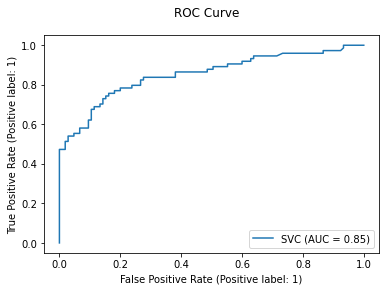

In [76]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 85%

# Confusion Matrix

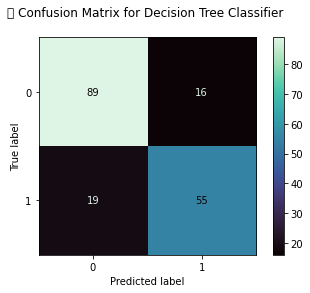

In [77]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

The above confusion matrix I am able to understand the many number of times I got the correct outputs and a few number of times my model missed to provide the correct prediction.

# Saving the model

In [78]:
filename = "Titanic_Final.pkl"
joblib.dump(Final_Model, filename)

['Titanic_Final.pkl']

# Conclusion

In [79]:
a=np.array(Y_test)
predicted=np.array(Final_Model.predict(X_test))
df_com= pd.DataFrame({"Original":a, "predicted": predicted}, index=range(len(a)))  #creating a data frame
df_com

,Original,predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
174,1,1
175,1,1
176,1,1
177,0,0


 Dataframe shows the Original and predicted values.